In [3]:
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
import math
import h5py

print_messages=False
loss_cost=[]

def load_dataset():
    train_dataset = h5py.File('../enchance/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('../enchance/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

def loss(y, y_pred):
    a = lambda x: y*np.log(x)
    b = lambda x: (1-y)*(1-np.log(1-y_pred))
    a=y*np.log(y_pred)
    b=(1-y)*(1-np.log(1-y_pred))
    response=-1*(a+b)
    return response

def read_img(filename, default_dims=(2560, 1920, 3)):
    #print(name, type(name))
    img = image.imread(filename)
    
    if img.shape==default_dims:
        img_resh=np.array(img).reshape(default_dims[0]*default_dims[1]*default_dims[2],1)
        return img_resh, img

def read_directory(mypath='../enchance/'):
    fls = [mypath+f for f in listdir(mypath) if isfile(join(mypath, f))]
    images_arr=[]
    for rec in fls:
        resp=read_img(rec)
        if resp!=None:
            print(rec)
            images_arr.append(resp[0])
    nparr=np.array(images_arr)
    nparr_reshaped=nparr.reshape(nparr.shape[1], nparr.shape[0])
    return nparr_reshaped

def cost(inp_loss):
    if print_messages: print("loss shape:", inp_loss.shape)
    return (-1/inp_loss.shape[1])*np.sum(inp_loss[0])
    
sgm1 = lambda x: 1/(1+math.e**-x)
learning_rate=0.001

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
print("X shape:{a}".format(a=train_set_x_orig.shape))

vector_size=train_set_x_orig.shape[1] * train_set_x_orig.shape[2] * train_set_x_orig.shape[3]
m=train_set_x_orig.shape[0]

print("vertical vector dimenstions (lines):", vector_size)

x=train_set_x_orig.reshape((vector_size, m))/255
#x=read_directory()

w=np.zeros((vector_size,1))
b=0

print("X shape:{var1}, W shape:{var2}".format(var1=x.shape, var2=w.shape))

print(np.zeros((3,4)))

print(x[0])

print(train_set_y.shape)
print(train_set_y)





X shape:(209, 64, 64, 3)
vertical vector dimenstions (lines): 12288
X shape:(12288, 209), W shape:(12288, 1)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[0.06666667 0.12156863 0.21960784 0.08627451 0.12941176 0.23137255
 0.09803922 0.1372549  0.24313725 0.09803922 0.1372549  0.24313725
 0.10588235 0.14117647 0.25098039 0.10980392 0.14901961 0.2627451
 0.11764706 0.16078431 0.27058824 0.12156863 0.16862745 0.28627451
 0.1254902  0.18431373 0.29803922 0.13333333 0.19215686 0.30980392
 0.1372549  0.19607843 0.32156863 0.14117647 0.2        0.32156863
 0.1372549  0.19607843 0.31764706 0.13333333 0.19215686 0.30980392
 0.12941176 0.18823529 0.30980392 0.12941176 0.18823529 0.30980392
 0.1254902  0.18431373 0.30588235 0.12156863 0.18039216 0.29803922
 0.11764706 0.17254902 0.29411765 0.11372549 0.17254902 0.29411765
 0.11372549 0.17254902 0.29411765 0.10588235 0.17254902 0.29019608
 0.10588235 0.16470588 0.28627451 0.09803922 0.16078431 0.27843137
 0.09019608 0.15686275 0.28235294 0.082352

In [4]:
for i in range(0,1000):
    if print_messages: print("this is w:",w)
    z=np.dot(w.transpose(), x) + b
    if print_messages: print("z shape (w*x):",z.shape)
    if print_messages: print("this is z:", z)

    a=sgm1(z)
    if print_messages: print("this is a:",a)
    L=loss(train_set_y,a)
    if print_messages: print("this is loss:", L)
    C=cost(L)
    if print_messages: print("this is cost:", C)
    loss_cost.append(C)

    dz=(a-train_set_y)/m
    if print_messages: print("this is dz:", dz)
    dw=np.dot(x,dz.T)/m
    correction=dw*learning_rate
    if print_messages: print("correction:",correction)
    w=w-correction
    if print_messages: print("="*20)
    if print_messages: print("this is updated W:",w)
    if i%50==0: print("loop: %s, loss: %s" % (i, C))

loop: 0, loss: 0.8710744819923275
loop: 50, loss: 0.8305233823316548
loop: 100, loss: 0.7957158049004796
loop: 150, loss: 0.7657779330582604
loop: 200, loss: 0.7399753344061984
loop: 250, loss: 0.717692047007293
loop: 300, loss: 0.6984114175973042
loop: 350, loss: 0.6816994242999905
loop: 400, loss: 0.6671905783569617
loop: 450, loss: 0.6545762034317587
loop: 500, loss: 0.6435947805082476
loop: 550, loss: 0.6340240291596754
loop: 600, loss: 0.6256744210497791
loop: 650, loss: 0.6183838622406755
loop: 700, loss: 0.612013324098349
loop: 750, loss: 0.6064432424530258
loop: 800, loss: 0.601570539064139
loop: 850, loss: 0.5973061480364974
loop: 900, loss: 0.5935729531064537
loop: 950, loss: 0.5903040604165405


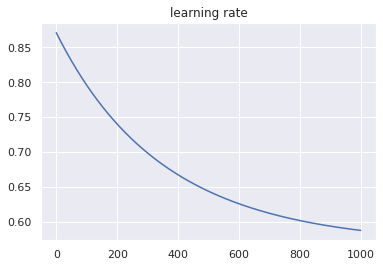

In [6]:
import seaborn as sns 
plt.title('learning rate')
sns.set_theme()
a=sns.lineplot(data=loss_cost)


In [ ]:
plt.imshow(train_set_x_orig[7])


In [1]:
x1 = np.random.rand(3, 2)

y1 = np.sum(x1, axis=0, keepdims=True)
y1.shape

NameError: name 'np' is not defined

In [2]:
x1

NameError: name 'x1' is not defined

In [56]:
A = np.random.randn(4,3)

B = np.sum(A, axis = 1, keepdims = True) 
B.shape

(4, 1)

In [57]:
B

array([[-1.02173611],
       [ 0.32300498],
       [-2.35827206],
       [ 1.7469219 ]])

In [60]:
x3 = np.random.rand(4, 5)

y3 = np.sum(x3, axis=1)
y3.shape

(4,)